<a href="https://colab.research.google.com/github/chrisnelsonlab/BMEG4983_2024/blob/main/W5_2024_BMEG4983.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://brand.uark.edu/_resources/images/UA_Logo_Horizontal.jpg width="400" height="96">

####BMEG 4983 - Genome Engineering and Synthetic Biology -
####For more information, check out the Nelson lab for Therapeutic Genome Engineering (https://nelsonlab.uark.edu/)

For image credits, see the linked URL

#5. Data Workshop 5 - Primer design, qPCR, and pandas

The goal for today is to be able to design primers for PCR and RT-PCR and be able to do analysis on quantitative PCR

# 5.1 PCR principle

<img src=https://upload.wikimedia.org/wikipedia/commons/a/ab/Polymerase_chain_reaction-en.svg width="800">
Credit wiki

Polymerase chain reaction works by using a DNA polymerase (copying enzyme), to directly copy a sequence of DNA. Each round, the polymerase enzymes add dNTPs (the nucleotides) extending the primer sequences (a sequence you specify)

Each round you (ideally) get 2 times the input. This exponential growth allows us to make a large amount of DNA or detect very rare sequences.

The two applications we will discuss today for PCR are:

1. **Cloning** - use PCR to make many copies of a sequence that we need to use for bioengineering applications (Discussed previously)

2. **Detection and quantification** - use PCR (or quantitative PCR) to quantify the original number of a specific gene. This can be used to tell you how frequent a specific transcript was inside a group of cells (or other genomics applications).



# 5.2 qRT-PCR

In a quantitative (q), Reverse Transcription (RT), Polymerase chain reaction (PCR), we are looking to quantify the transcript level of cells or tissues.



#5.2.1 Primer 3 Demonstration

Use primer 3
Find it here
https://primer3.ut.ee/

In the future, we can use the python version.

Try designing a primer for your gene. See the example below:



## 5.2.2 Example qRT-PCR primer design

```
GAPDH cDNA
ATGGGGAAGGTGAAGGTCGGAGTCAACGGATTTGGTCGTATTGGGCGCCTGGTCACCAGGGCTGCTTTTAACTCTGGTAAAGTGGATATTGTTGCCATCAATGACCCCTTCATTGACCTCAACTACATGGTTTACATGTTCCAATATGATTCCACCCATGGCAAATTCCATGGCACCGTCAAGGCTGAGAACGGGAAGCTTGTCATCAATGGAAATCCCATCACCATCTTCCAGGAGCGAGATCCCTCCAAAATCAAGTGGGGCGATGCTGGCGCTGAGTACGTCGTGGAGTCCACTGGCGTCTTCACCACCATGGAGAAGGCTGGGGCTCATTTGCAGGGGGGAGCCAAAAGGGTCATCATCTCTGCCCCCTCTGCTGATGCCCCCATGTTCGTCATGGGTGTGAACCATGAGAAGTATGACAACAGCCTCAAGATCATCAGCAATGCCTCCTGCACCACCAACTGCTTAGCACCCCTGGCCAAGGTCATCCATGACAACTTTGGTATCGTGGAAGGACTCATGACCACAGTCCATGCCATCACTGCCACCCAGAAGACTGTGGATGGCCCCTCCGGGAAACTGTGGCGTGATGGCCGCGGGGCTCTCCAGAACATCATCCCTGCCTCTACTGGCGCTGCCAAGGCTGTGGGCAAGGTCATCCCTGAGCTGAACGGGAAGCTCACTGGCATGGCCTTCCGTGTCCCCACTGCCAACGTGTCAGTGGTGGACCTGACCTGCCGTCTAGAAAAACCTGCCAAATATGATGACATCAAGAAGGTGGTGAAGCAGGCGTCGGAGGGCCCCCTCAAGGGCATCCTGGGCTACACTGAGCACCAGGTGGTCTCCTCTGACTTCAACAGCGACACCCACTCCTCCACCTTTGACGCTGGGGCTGGCATTGCCCTCAACGACCACTTTGTCAAGCTCATTTCCTGGTATGACAACGAATTTGGCTACAGCAACAGGGTGGTGGACCTCATGGCCCACATGGCCTCCAAGGAGTAA
```

I'll drop this sequence into Primer3

Use the human mispriming library

In the product size ranges, choose 60-120. These are good sizes for qRT-PCR

Notice that there are many other options. Feel free to explore these.

Or you can click the 'pick primers' button. This will give you several options. Next we need to confirm that they are exon spanning.

We want to make sure that our primers are exon spanning. This means that our exons go over exon junctions. There are a few ways we can do this. See the guide below for more information

Option 1 - One of your primers exists in two exons
Option 2 - Both primers are separated by an intron

<img src=https://sfvideo.blob.core.windows.net/sitefinity/images/default-source/default-album/decoded-temp-image-storage/art52-fig1-new-schematic-request_maureen_v3.png width="600">


The image above is from this helpful guide:

https://www.idtdna.com/pages/education/decoded/article/use-splice-junctions-to-your-advantage-in-qpcr


My first attempt gave me:

FWD: CAAATTCCATGGCACCGTCA

REV: ATCGCCCCACTTGATTTTGG

Aligned to the genome, I found the region here:
chr12:6,536,710-6,536,956

While these are technically exon-spanning, the intron is a little short

The next set, primer1 spans across two exons. That could work. I had trouble finding the first primer with blat and had to add some sequence back for context. If your primer doesnt' show up, add some bases to either end to make it longer.

FWD: CGTGGAAGGACTCATGACCA

REV: ATGATGTTCTGGAGAGCCCC

Try out several more!


Here is the full list

Primer | Start | len | tm | gc% | any_th | 3'th | hairpin | rep  | seq
--- | ---  | --- | --- | --- | --- | --- | --- | --- | ---
LEFT PRIMER | 510 | 20 | 59.39 | 55 | 5.24 | 1.03 | 0 | 12 | CGTGGAAGGACTCATGACCA
RIGHT PRIMER | 620 | 20 | 59.16 | 55 | 0 | 0 | 0 | 11 | ATGATGTTCTGGAGAGCCCC
LEFT PRIMER | 224 | 20 | 58.95 | 55 | 0 | 0 | 0 | 12 | CCATCTTCCAGGAGCGAGAT
RIGHT PRIMER | 294 | 20 | 59.55 | 60 | 0 | 0 | 0 | 10 | GGACTCCACGACGTACTCAG
LEFT PRIMER | 774 | 20 | 58.76 | 55 | 0 | 0 | 0 | 12 | CAAGAAGGTGGTGAAGCAGG
RIGHT PRIMER | 873 | 19 | 59.06 | 57.89 | 0 | 0 | 0 | 11 | GTGGGTGTCGCTGTTGAAG
LEFT PRIMER | 186 | 20 | 59.24 | 50 | 2.1 | 0 | 0 | 12 | TGAGAACGGGAAGCTTGTCA
RIGHT PRIMER | 269 | 19 | 58.81 | 52.63 | 0 | 0 | 0 | 11 | GCATCGCCCCACTTGATTT

# 5.3 qRT-PCR Data Analysis
Let's import some data. This is pseduo data for the following experiment.

We have a drug that we hypothesize will decrease angiogenesis (blood vessel growth). This may help treat tumors.

After treating mice with either:

A - placebo

B - low dose

C - high dose

We want to know the effect.

The data can be found here:

https://raw.githubusercontent.com/chrisnelsonlab/BMEG4983/master/qPCR_pseudo.csv

Does the drug have a statisically significant effect?

We will use the delta-delta Ct method to analyze this data. This uses a control gene.


## 5.3.1 Import data using Pandas

   Treatment Biological replicate Gene Target   Ct1   Ct2  Ctmean
9          A                    1        VEGF  21.6  17.4   21.55
10         A                    2        VEGF  21.9  17.2   22.25
11         A                    3        VEGF  21.7  17.2   22.10


<ipython-input-3-b99cc1774e44>:43: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  VEGFmean = df_TR_avg.loc[df_TR_avg['Gene Target']== 'VEGF'].loc[df_TR_avg['Treatment']== 'A'].mean().Ctmean
<ipython-input-3-b99cc1774e44>:44: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  GAPDHmean = df_TR_avg.loc[df_TR_avg['Gene Target']== 'GAPDH'].loc[df_TR_avg['Treatment']== 'A'].mean().Ctmean


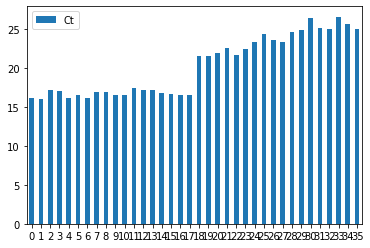

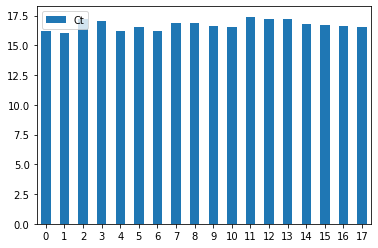

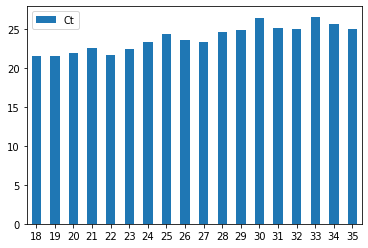

In [ ]:
from pandas.core.apply import GroupByApply
from __future__ import print_function
import pandas as pd
pd.__version__


#Read in sample data ##Note, correct name header
qPCR_df = pd.read_csv("https://raw.githubusercontent.com/chrisnelsonlab/BMEG4983/master/qPCR_pseudo.csv", sep=",")


#First let's check to see if the technical replicates are similiar
qPCR_df = qPCR_df.sort_values(["Gene Target", "Treatment", "Biological replicate"], ascending = (True, True, True))

#Let's reset the index
qPCR_df = qPCR_df.reset_index(drop=True)

#A bar plot that shows all the values in a row. Because we sorted, the values
#next to each other should be the technical replicates.
qPCR_df.plot.bar(rot=0, y='Ct')
#What we are looking for here is any crazy outliers from a bad sample.
#Important: Do not discard data. If a technical replicate reads very high or
#very low, that may be a reason to discard later, but always keep all data.

#That was too busy, let's try just GAPDH
qPCR_df.loc[qPCR_df['Gene Target']== 'GAPDH'].plot.bar(rot=0, y='Ct')

#And now just VEGF
qPCR_df.loc[qPCR_df['Gene Target']== 'VEGF'].plot.bar(rot=0, y='Ct')

#Next, let's average the technical replicates.
#Make a new data frame with the average technical replicates
column_names = ["Treatment", "Biological replicate", "Gene Target", 'Ct1','Ct2','Ctmean']
df_TR_avg = pd.DataFrame(columns = column_names)
for i in range(int(len(qPCR_df)/2)):
  df2 = pd.DataFrame()
  tempmean = (qPCR_df.loc[i*2, 'Ct']+qPCR_df.loc[i*2+1, 'Ct'])/2
  df_TR_avg = df_TR_avg.append([{'Treatment':qPCR_df.loc[i*2, 'Treatment'], 'Biological replicate':qPCR_df.loc[i*2, 'Biological replicate'], 'Gene Target':qPCR_df.loc[i*2, 'Gene Target'], 'Ct1':qPCR_df.loc[i*2, 'Ct'], 'Ct2':qPCR_df.loc[i+1*2, 'Ct'], 'Ctmean':tempmean}])

df_TR_avg = df_TR_avg.reset_index(drop=True)

#Now we need to get the average of the no treatment groups (Group A) for both genes
print(df_TR_avg.loc[df_TR_avg['Gene Target']== 'VEGF'].loc[df_TR_avg['Treatment']== 'A'])
VEGFmean = df_TR_avg.loc[df_TR_avg['Gene Target']== 'VEGF'].loc[df_TR_avg['Treatment']== 'A'].mean().Ctmean
GAPDHmean = df_TR_avg.loc[df_TR_avg['Gene Target']== 'GAPDH'].loc[df_TR_avg['Treatment']== 'A'].mean().Ctmean

delta_Cts = []
for i in range(len(df_TR_avg)):
  if(df_TR_avg.loc[i, 'Gene Target']=='VEGF'):
    delta_Cts.append(df_TR_avg.loc[i, 'Ctmean']-VEGFmean)

  elif(df_TR_avg.loc[i, 'Gene Target']=='GAPDH'):
    delta_Cts.append(df_TR_avg.loc[i, 'Ctmean']-GAPDHmean)

  else:
    print('unexpected gene name')

df_TR_avg['deltaCt'] = delta_Cts

#Now for the delta delta Ct, we compare to the reference gene (in this case GAPDH)
#Lets break up our dataframe into two by gene (probably should have done that at the beginning)
grouped = df_TR_avg.groupby(df_TR_avg['Gene Target'])
df_TR_avg_GAPDH = grouped.get_group("GAPDH")
df_TR_avg_GAPDH = df_TR_avg_GAPDH.reset_index(drop=True)

df_TR_avg_VEGF = grouped.get_group("VEGF")
df_TR_avg_VEGF = df_TR_avg_VEGF.reset_index(drop=True)

delta_delta_Cts = []
fold_changes = []
for i in range(len(df_TR_avg_VEGF)):
  delta_delta_Cts.append(df_TR_avg_GAPDH.loc[i,'deltaCt']-df_TR_avg_VEGF.loc[i,'deltaCt'])
  fold_changes.append(2**(df_TR_avg_GAPDH.loc[i,'deltaCt']-df_TR_avg_VEGF.loc[i,'deltaCt']))

df_TR_avg_VEGF['ddCts']=delta_delta_Cts
df_TR_avg_VEGF['Fold Change']=fold_changes



## 5.3.2 Graphing data with seaborn

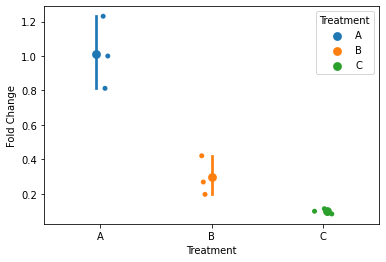

In [ ]:
#Now let's plot the fold change
import seaborn as sns

#sns.stripplot(x=df_TR_avg_VEGF['Treatment'], y=df_TR_avg_VEGF['Fold Change'], jitter=False)
sns.stripplot(x="Treatment", y="Fold Change", data=df_TR_avg_VEGF)

ax=sns.pointplot(x="Treatment", y="Fold Change", hue='Treatment',data=df_TR_avg_VEGF,join=False,dodge=True)


#And do some stats.

## 5.3.3 Statistics

In [ ]:
#If we do a t-test, Should we account for multiple comparisons?
#Consider how you would accomplish this.

#Consider using built in tools:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

#5.4 Learning Check

In [ ]:
#@title Learning Check (input answers and hit play button)

#@markdown Q1: I've been to Primer 3 and can design primers for a target gene
answer1 = ' ' #@param [" ","Yes", "No"]

#@markdown Q2: Ture/False, Primers should be on the same strand of DNA
answer2 = ' ' #@param [" ","True", "False"]


#@markdown Q3: Which side of the DNA is on the left when we write sequences

#@markdown If your gene is running from right to left, don't forget to reverse complement
answer3 = " " #@param [" ","5'", "3'"]


#@markdown Q4: PCR can be used for:
answer4 = ' ' #@param [" ","analyzing gene expression", "finding viral copy number","creating constructs for cloning","All of the above"]



if (answer1 == "Yes"):
  print('Q1: Good')
else:
  print('Q1: Go to genome browser!')

if (answer2 == "False"):
  print('Q2: Good')
else:
  print('Q2: One primer should be on the opposite strand')

if (answer3 == "5'"):
  print('Q3: Correct')
else:
  print('Q3: Incorrect')

if (answer4 == "All of the above"):
  print('Q4: Correct')
else:
  print('Q4: Incorrect, PCR is a very flexible technique')


Q1: Good
Q2: Good
Q3: Incorrect
Q4: Incorrect, PCR is a very flexible technique


#5.5 Homework 5

## 5.5.1 Homework 5 Question 1
Design qRT-PCR primers for your gene.
Considerations:
1. They should be exon spanning if possible
2. They should make an amplicon between 60-120 bp.
3. Use a human transcriptome as an off-priming search

Example from TP53


```
forward
5'-TGGCCATCTACAAGCAGTCA-3'
reverse
5'-ATAAGATGCTGAGGAGGGGC-3'
```





## 5.5.2 Homework 5, Question 2

What is the sequence created by your PCR primers above?
Make sure not to include introns.

Example answer from TP53
```
>Amplicon
TGGCCATCTACAAGCAGTCAcagcacatgacggaggttgtgaggcgctgc
ccccaccatgagcgctgctcagatagcgatggtctgGCCCCTCCTCAGCA
TCTTAT
```

What is the size of the amplicon created?
```
106 bp
```

## 5.5.3 Homework 5, Question 3
CD44 isoform expression is dysregulated in cancer. You want to design qRT-PCR primers to differentiate between the two isoforms listed below.

a.	https://www.ncbi.nlm.nih.gov/nuccore/NM_000610.4

b.	https://www.ncbi.nlm.nih.gov/nuccore/NM_001001389.2

How would you go about this? How can you tell the difference?
```
Answer
```

What primers would you use?
```
Primer set 1
forward
5'-SEQ-3'
reverse
5'-SEQ-3'

Primer set 2
forward
5'-SEQ-3'
reverse
5'-SEQ-3'
```

```


### 5.5.4 Homework 5, Question 4

You are designing a longitudinal experiment to test the longevity of your gene therapy approach. You collect the attached Cq values for your target gene and control genes based on three different treatment groups over time. Graph your results based on the ∆∆Ct method. Comment briefly on the results.  

Data is available here:
https://github.com/chrisnelsonlab/BMEG4983/blob/master/PS5_qPCR.csv

Raw data here:

https://raw.githubusercontent.com/chrisnelsonlab/BMEG4983/master/PS5_qPCR.csv

FAQ: Time points are days

Consider what you are comparing here. Treatment groups? Time points? Both?


In [ ]:
#Placeholder code if you want to adapt code.
#You can also use excel or your preferred method for data analysis